In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import numpy as np
from collections import defaultdict

# Load and parse the data from file
with open("./report.txt", "r") as f:
    text = f.read().split("\n")
dict_arr = [ast.literal_eval(strv) for strv in text if strv]

In [43]:
forg= [0.53319357092942]
util= [0.6045796241662836]
k_frac= [0]
time= [2.4731943607330322]

forg.extend([dictv["forg_val"] for dictv in dict_arr])
util.extend([dictv["util_val"] for dictv in dict_arr])
time.extend([dictv["time_taken"] for dictv in dict_arr])
k_frac.extend([dictv["k_frac"] for dictv in dict_arr])

/tmp/ipykernel_1156506/592981243.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


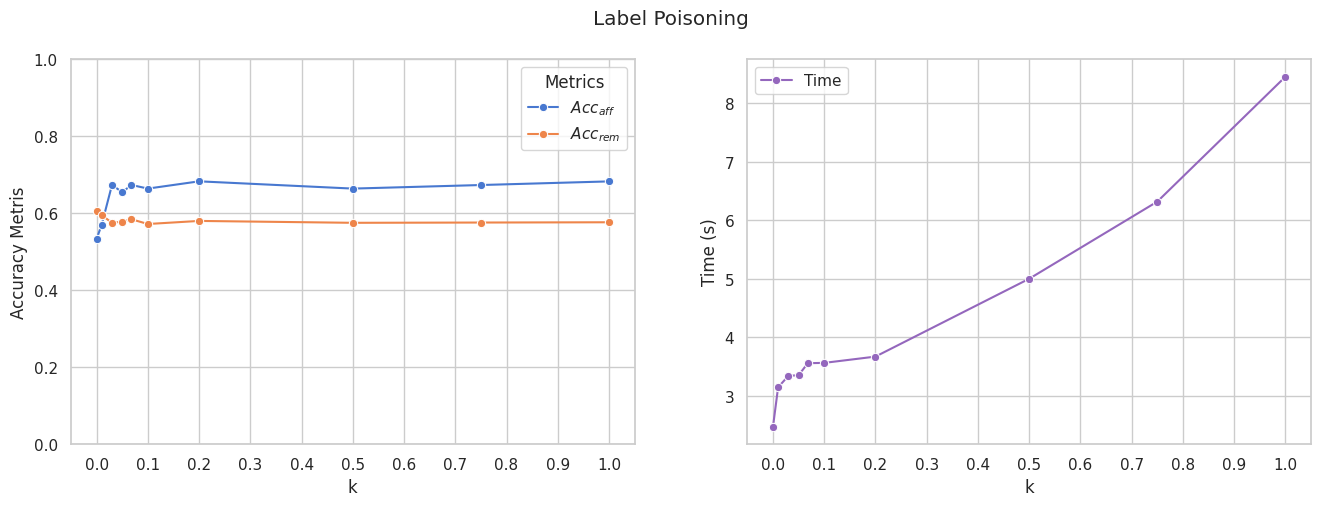

In [44]:
sns.set(style="whitegrid", palette="muted")
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, gridspec_kw={'hspace': 0.4})
sns.lineplot(x=k_frac, y=forg, label='$Acc_{aff}$', ax=axes[0], marker='o')
sns.lineplot(x=k_frac, y=util, label='$Acc_{rem}$', ax=axes[0], marker='o')
axes[0].set_ylabel("Accuracy Metris")
axes[0].legend(title="Metrics")
axes[0].set_xlabel("k")
axes[0].set_ylim(0, 1)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

# Second subplot: `time` vs. `k_frac`
sns.lineplot(x=k_frac, y=time, label='Time', ax=axes[1], color="tab:purple", marker='o')
axes[1].set_xlabel("k")
axes[1].set_ylabel("Time (s)")
# Show the plot
plt.suptitle("Label Poisoning")
plt.tight_layout()
plt.show()

In [45]:
with open("./report_edge.txt", "r") as f:
    text = f.read().split("\n")
dict_arr = [ast.literal_eval(strv) for strv in text if strv]

forg= [0.767120894479385]
util= [0.531244550941465]
k_frac= [0]
time= [2.161588430404663]

forg.extend([dictv["forg_val"] for dictv in dict_arr])
util.extend([dictv["util_val"] for dictv in dict_arr])
time.extend([dictv["time_taken"] for dictv in dict_arr])
k_frac.extend([dictv["k_frac"] for dictv in dict_arr])

/tmp/ipykernel_1156506/2086128556.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


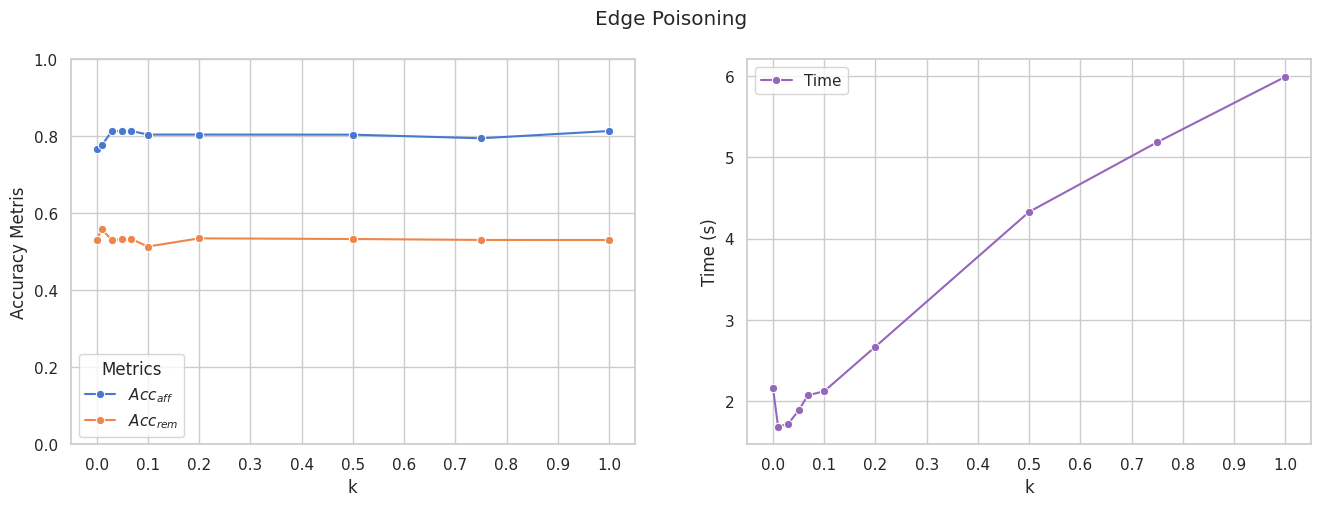

In [46]:
sns.set(style="whitegrid", palette="muted")
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, gridspec_kw={'hspace': 0.4})
sns.lineplot(x=k_frac, y=forg, label='$Acc_{aff}$', ax=axes[0], marker='o')
sns.lineplot(x=k_frac, y=util, label='$Acc_{rem}$', ax=axes[0], marker='o')
axes[0].set_ylabel("Accuracy Metris")
axes[0].legend(title="Metrics")
axes[0].set_xlabel("k")
axes[0].set_ylim(0, 1)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

# Second subplot: `time` vs. `k_frac`
sns.lineplot(x=k_frac, y=time, label='Time', ax=axes[1], color="tab:purple", marker='o')
axes[1].set_xlabel("k")
axes[1].set_ylabel("Time (s)")
# Show the plot
plt.suptitle("Edge Poisoning")
plt.tight_layout()
plt.show()